## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [9]:
##### Your Code Here #####
### Let's do it!

from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

In [10]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [11]:
X_train.shape

(404, 13)

In [12]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# create our model
model = Sequential()

#input layer
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(10, activation='relu'))

# output layer
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error',
                   optimizer='adam',
                   metrics=['mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_15 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [85]:
y_train.shape

(404,)

In [86]:
batch_size = 32
epochs = 600

In [87]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=.1, verbose =0)

In [88]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

102/102 [==============================] - 0s 44us/sample - loss: 16.1163 - mean_squared_error: 16.1163
mean_squared_error: 1611.6321563720703


In [89]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

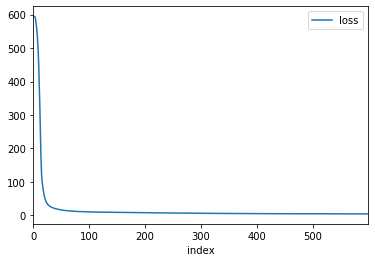

In [90]:
import pandas as pd
df = pd.DataFrame(data=history.history, index=history.epoch)
df.reset_index().plot(x='index', y='loss');

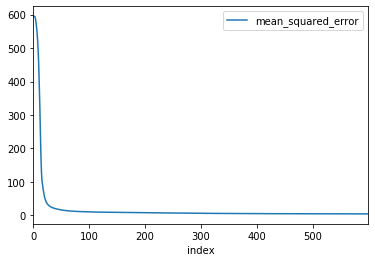

In [91]:
df.reset_index().plot(x='index', y='mean_squared_error');

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)

preds = reg.predict(X_test)

print('MSE ', mean_squared_error(preds,y_test))

MSE  23.195599256422998


In [95]:
# The linear regression is much more accurate for this problem

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [122]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [123]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [124]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [125]:
# reshape X
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [126]:
# from the documentation  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
num_class = 10


In [127]:
# one hot encode y
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [128]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [129]:
X_test.shape, y_test.shape

((10000, 784), (10000, 10))

In [147]:
# create our model
fashion = Sequential()

# input layer
fashion.add(Dense(16, input_dim=784, activation='relu'))

#pruning layer
fashion.add(Dropout(0.5))

#add hidden layer
fashion.add(Dense(10, activation='relu'))

#output layer
fashion.add(Dense(10, activation='softmax'))

# compile
fashion.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [148]:
batch_size = 32
epochs = 150

history = fashion.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=.1, verbose =0)
scores = fashion.evaluate(X_test, y_test)
print(f'{fashion.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 31us/sample - loss: 1.9234 - acc: 0.1958
acc: 19.580000638961792


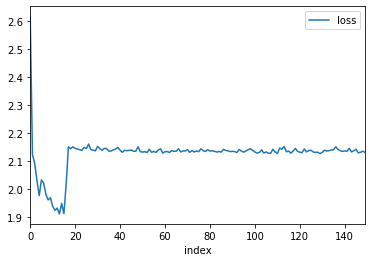

In [149]:
df = pd.DataFrame(data=history.history, index=history.epoch)
df.reset_index().plot(x='index', y='loss');

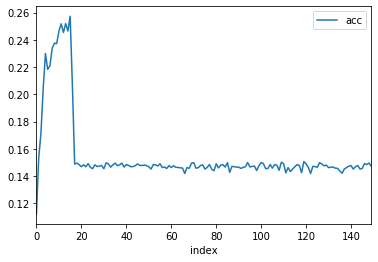

In [150]:
df.reset_index().plot(x='index', y='acc');

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.